In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from statistics import mean
from scipy import signal
%matplotlib inline 

In [2]:
dane_lista_lewy=[]
dane_lista_prawy=[]
directory_path="/Users/janek/Desktop/Studia/EAM/"

bl_sciezki=[directory_path+'BL_'+str(i+1)+'.csv' for i in range(5)]
bp_sciezki=[directory_path+'BP_'+str(i+1)+'.csv' for i in range(4)]

In [3]:
srednie_l=[]
for path in bl_sciezki:
    with open(path) as csvfile:
        mydata=csv.reader(csvfile,delimiter=';')
        dane=[]
        for row in mydata:
            try: 
                if row[2] is None:
                    raise ValueError
                dane.append(float(row[2]))
            
            except (TypeError,ValueError):
                pass
        srednia=int(mean([abs(x) for x in dane]))
        srednie_l.append(srednia)    
        
        dane=np.asarray(dane)
    dane_lista_lewy.append(dane)


In [4]:
srednie_p=[]
for path in bp_sciezki:
    with open(path) as csvfile:
        
        mydata=csv.reader(csvfile,delimiter=';')
        dane=[]
        for row in mydata:
            try: 
                if row[2] is None:
                    raise ValueError
                dane.append(float(row[2]))
            
            except (TypeError,ValueError):
                pass
        #usuwam outlayery
        srednia=int(mean([abs(x) for x in dane]))
        srednie_p.append(srednia)
        
        dane=np.asarray(dane)
    dane_lista_prawy.append(dane)

In [5]:
print(len(srednie_p))
print(len(srednie_l))
print(len(dane_lista_prawy))
print(len(dane_lista_lewy))

4
5
4
5


In [6]:
dane_lista_prawy[0].shape

(65468,)

In [7]:
for i,dane in enumerate (dane_lista_prawy):
    dane_lista_prawy[i]=dane[abs(dane)<6*srednie_p[i]]
for i,dane in enumerate (dane_lista_lewy):
    dane_lista_lewy[i]=dane[abs(dane)<6*srednie_l[i]]

    

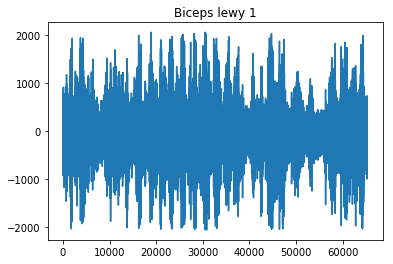

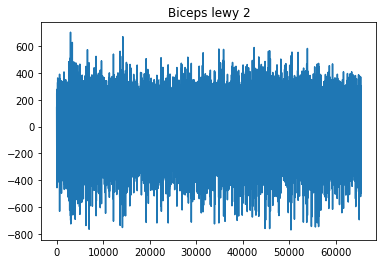

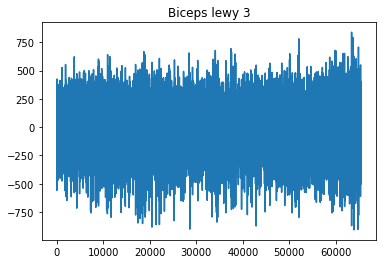

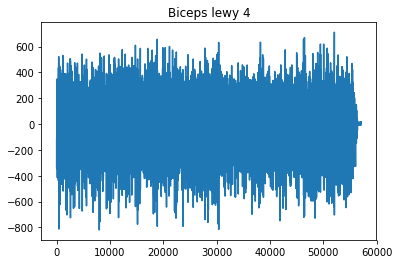

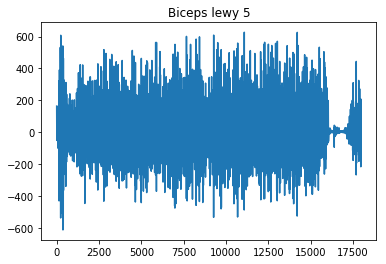

In [139]:
for i,wykres in enumerate (dane_lista_lewy):
    plt.figure(i)
    plt.plot(wykres)
    plt.title('Biceps lewy '+str(i+1))

Text(0, 0.5, 'Amplituda [uV]')

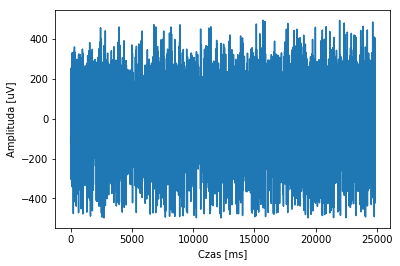

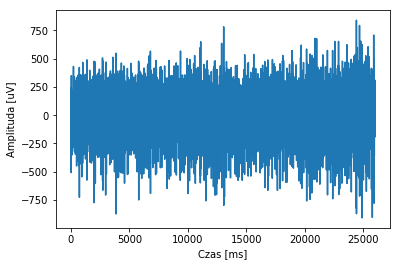

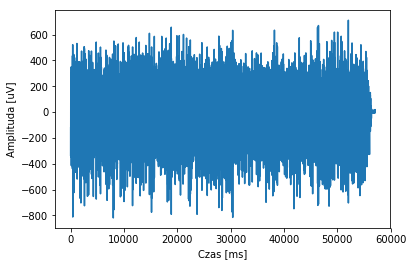

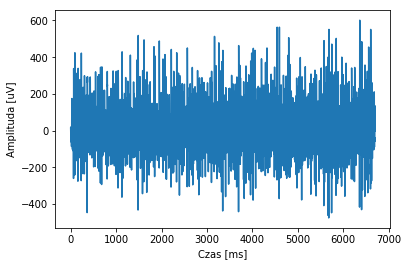

In [39]:
b_l_2=dane_lista_lewy[1]
b_l_3=dane_lista_lewy[2]
b_l_4=dane_lista_lewy[3]
b_l_5=dane_lista_lewy[4]

b_l_2=b_l_2[20000:45000]
b_l_2=b_l_2[abs(b_l_2)<500]
plt.figure()
plt.plot(b_l_2)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")
b_l_3=b_l_3[39000:65000]
plt.figure()
plt.plot(b_l_3)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")
b_l_4=b_l_4[0:220000]
plt.figure()
plt.plot(b_l_4)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")
b_l_5=b_l_5[1300:8000]
plt.figure()
plt.plot(b_l_5)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")


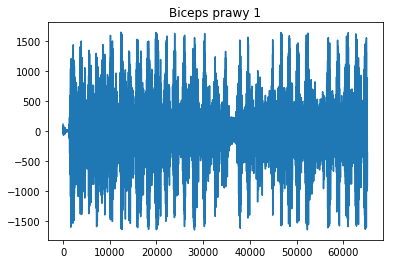

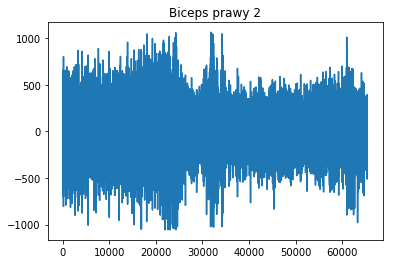

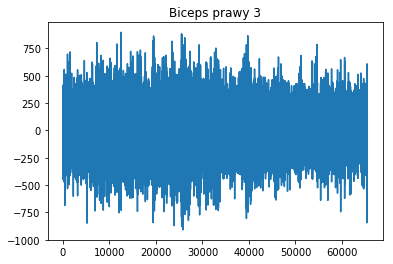

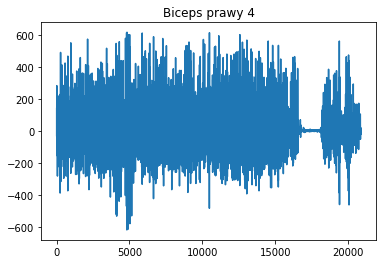

In [140]:
for i,wykres in enumerate (dane_lista_prawy):
    plt.figure(i)
    plt.plot(wykres)
    plt.title('Biceps prawy '+str(i+1))

Text(0, 0.5, 'Amplituda [uV]')

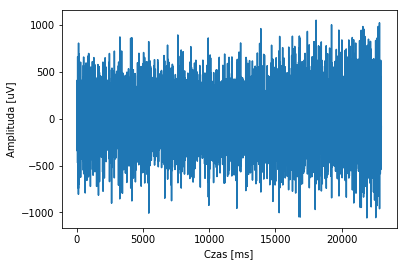

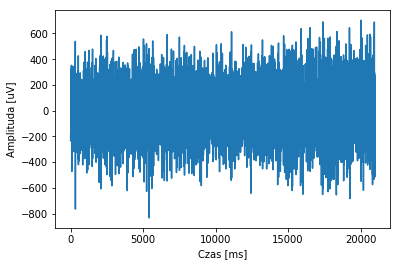

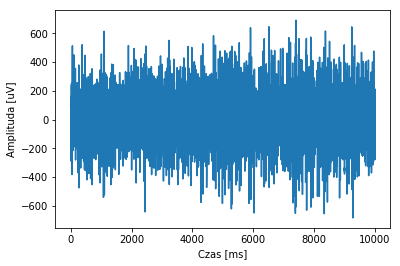

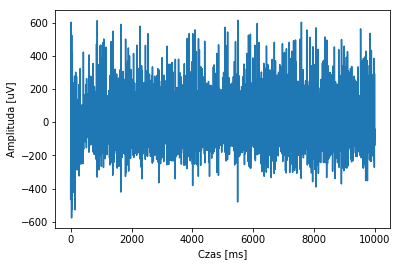

In [38]:
b_p_2=dane_lista_prawy[1]
b_p_3=dane_lista_prawy[2]
b_p_4=dane_lista_prawy[3]


b_p_2=b_p_2[:23000]

plt.figure()
plt.plot(b_p_2)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")

b_p_3=dane_lista_prawy[1][40000:61000]
plt.figure()
plt.plot(b_p_3)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")

b_p_4=dane_lista_prawy[1][50000:60000]
plt.figure()
plt.plot(b_p_4)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")

b_p_5=dane_lista_prawy[3][5000:15000]
plt.figure()
plt.plot(b_p_5)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda [uV]")


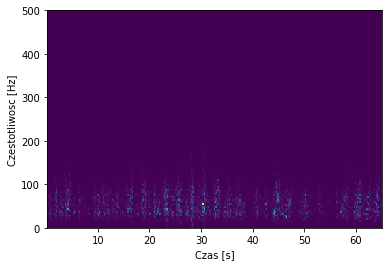

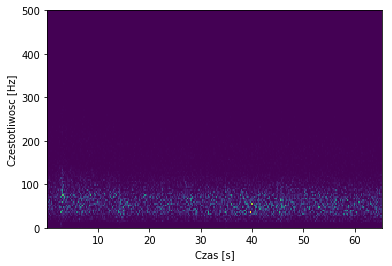

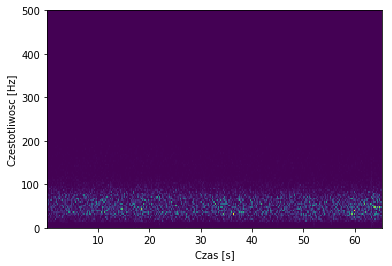

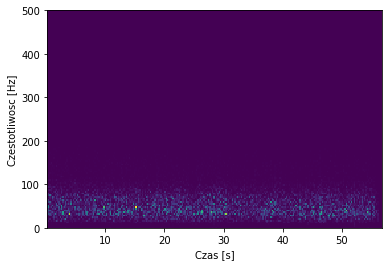

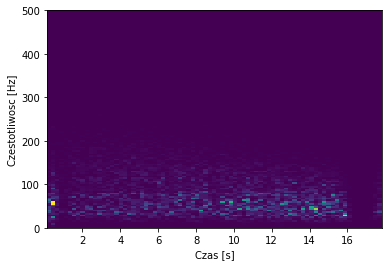

In [44]:
fs=1000
for i,dane in enumerate(dane_lista_lewy):
    
    f, t, Sxx = signal.spectrogram(dane, fs)
    plt.figure(i)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Czestotliwosc [Hz]')
    plt.xlabel('Czas [s]')
    #plt.title("Spectrogram biceps lewy "+str(i+1))
    plt.show()

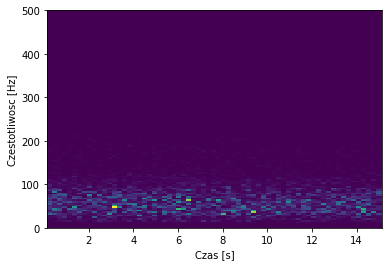

In [43]:
fs=1000

    
f, t, Sxx = signal.spectrogram(dane_lista_lewy[1][50000:], fs)
plt.figure()
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Czestotliwosc [Hz]')
plt.xlabel('Czas [s]')
plt.show()

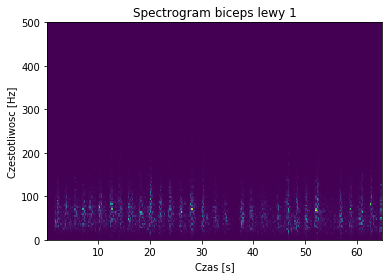

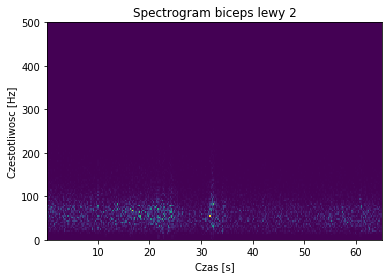

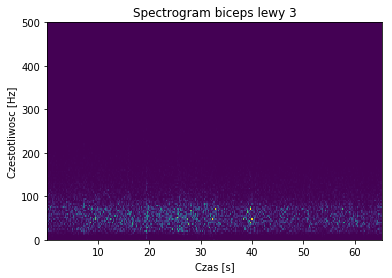

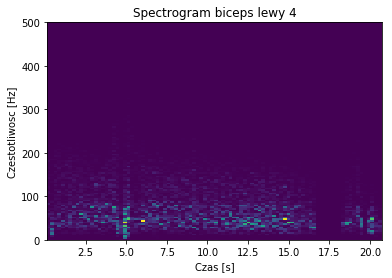

In [170]:
for i,dane in enumerate(dane_lista_prawy):
    
    f, t, Sxx = signal.spectrogram(dane, fs)
    plt.figure(i)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Czestotliwosc [Hz]')
    plt.xlabel('Czas [s]')
    plt.title("Spectrogram biceps lewy "+str(i+1))
    plt.show()